# **Pizza Delivery Delays**

### **Objective**

To analyze delivery performance and predict how long a delivery might be delayed, helping optimize operations during peak hours or traffic conditions.

### **Importing Libraries**

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

### **Loading and Exploring Datasets**

In [2]:
df = pd.read_csv("Enhanced_pizza_sell_data_2024-25.csv")
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [3]:
df.shape # Check for the total number of rows and columns in the loaded datset

(1004, 25)

In [4]:
df.columns # View all the columns of the loaded dataset

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Pizza Size', 'Pizza Type',
       'Toppings Count', 'Distance (km)', 'Traffic Level', 'Payment Method',
       'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)',
       'Topping Density', 'Order Month', 'Payment Category',
       'Estimated Duration (min)', 'Delay (min)', 'Is Delayed',
       'Pizza Complexity', 'Traffic Impact', 'Order Hour',
       'Restaurant Avg Time'],
      dtype='object')

In [5]:
df.isnull().sum() # Check for missing values in each column

Order ID                        0
Restaurant Name                 0
Location                        0
Order Time                      0
Delivery Time                   0
Delivery Duration (min)         0
Pizza Size                      0
Pizza Type                      0
Toppings Count                  0
Distance (km)                   0
Traffic Level                   0
Payment Method                  0
Is Peak Hour                    0
Is Weekend                      0
Delivery Efficiency (min/km)    0
Topping Density                 0
Order Month                     0
Payment Category                0
Estimated Duration (min)        0
Delay (min)                     0
Is Delayed                      0
Pizza Complexity                0
Traffic Impact                  0
Order Hour                      0
Restaurant Avg Time             0
dtype: int64

In [6]:
df.duplicated().sum() # Check for any duplicates in the dataset

np.int64(0)

In [7]:
df.dtypes # Check for data types of each column

Order ID                         object
Restaurant Name                  object
Location                         object
Order Time                       object
Delivery Time                    object
Delivery Duration (min)           int64
Pizza Size                       object
Pizza Type                       object
Toppings Count                    int64
Distance (km)                   float64
Traffic Level                    object
Payment Method                   object
Is Peak Hour                       bool
Is Weekend                         bool
Delivery Efficiency (min/km)    float64
Topping Density                 float64
Order Month                      object
Payment Category                 object
Estimated Duration (min)        float64
Delay (min)                     float64
Is Delayed                         bool
Pizza Complexity                  int64
Traffic Impact                    int64
Order Hour                        int64
Restaurant Avg Time             float64


In [8]:
df.describe() # Descriptiive statistics of the numeric (int and float) columns

,Delivery Duration (min),Toppings Count,Distance (km),Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,29.492032,3.362550,4.945618,6.397006,0.714684,11.869482,17.622550,9.468127,2.049801,18.691235,29.492032
std,7.753103,1.135853,1.951463,1.562573,0.203020,4.683510,3.964289,6.233731,0.775696,1.529466,0.859941
min,15.000000,1.000000,2.000000,4.166667,0.266667,4.800000,9.000000,1.000000,1.000000,12.000000,26.666667
25%,25.000000,3.000000,3.500000,5.000000,0.600000,8.400000,15.200000,6.000000,1.000000,18.000000,28.844221
50%,30.000000,3.000000,4.500000,6.000000,0.666667,10.800000,17.800000,6.000000,2.000000,19.000000,29.948454
75%,30.000000,4.000000,6.000000,7.142857,0.833333,14.400000,20.400000,12.000000,3.000000,20.000000,30.259434
max,50.000000,5.000000,10.000000,12.500000,1.500000,24.000000,30.080000,20.000000,3.000000,21.000000,30.286458


### **Exploratory Data Analysis (EDA) & Feature Engineering**

We analyze the data to identify outliers, convert data types, and prepare features for modeling.

#### 1. Identify Numeric Columns & Visualize Outliers through Boxplots. Boxplots help us visualize the spread and detect outliers in each numeric column.

In [9]:
# Identifying the numeric columns and storing them as a list

numeric_cols = []

for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        numeric_cols.append(i)
    else:
        continue

numeric_cols

['Delivery Duration (min)',
 'Toppings Count',
 'Distance (km)',
 'Delivery Efficiency (min/km)',
 'Topping Density',
 'Estimated Duration (min)',
 'Delay (min)',
 'Pizza Complexity',
 'Traffic Impact',
 'Order Hour',
 'Restaurant Avg Time']

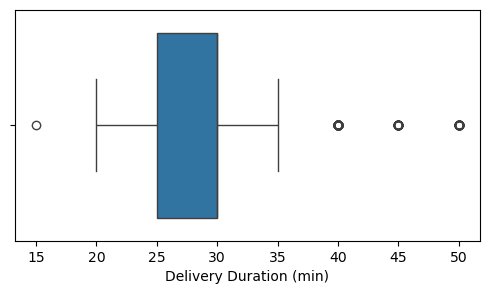

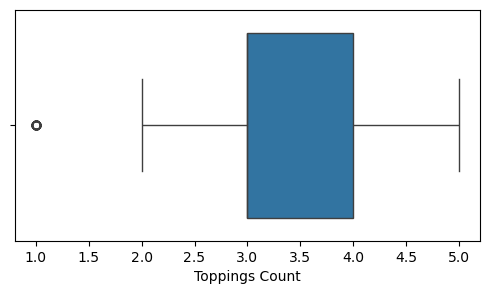

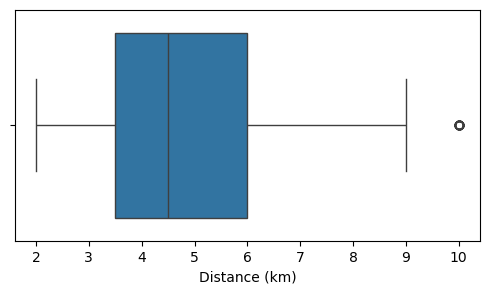

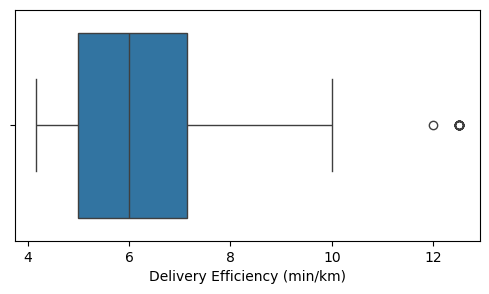

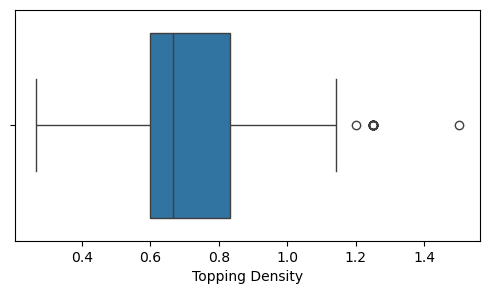

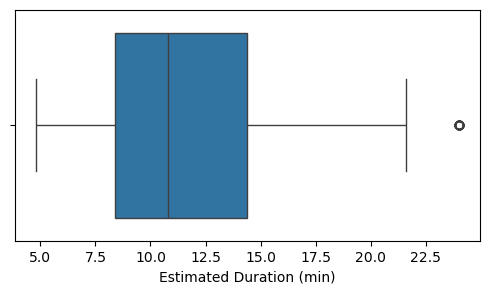

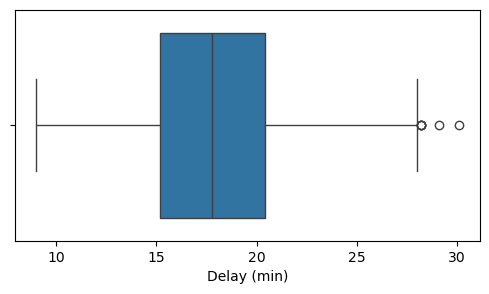

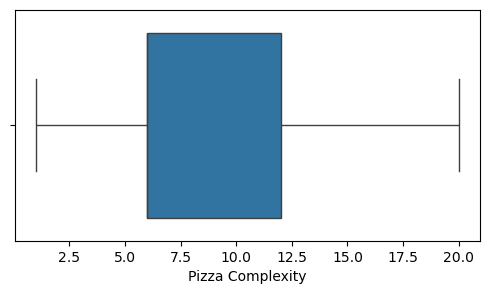

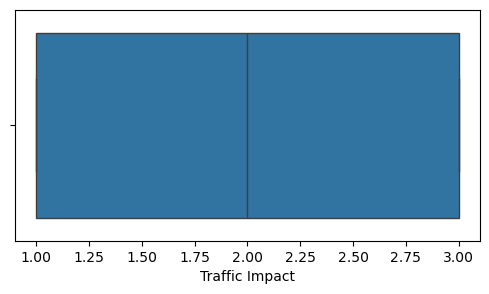

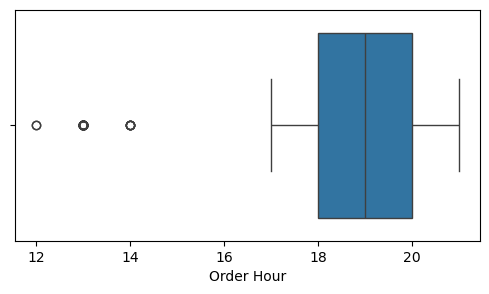

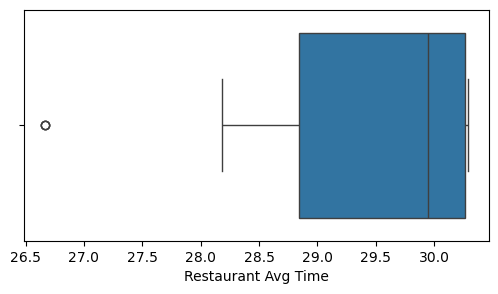

In [10]:
# Boxplots

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x = df[col])
    plt.show()

#### 2. Correlation Heatmap

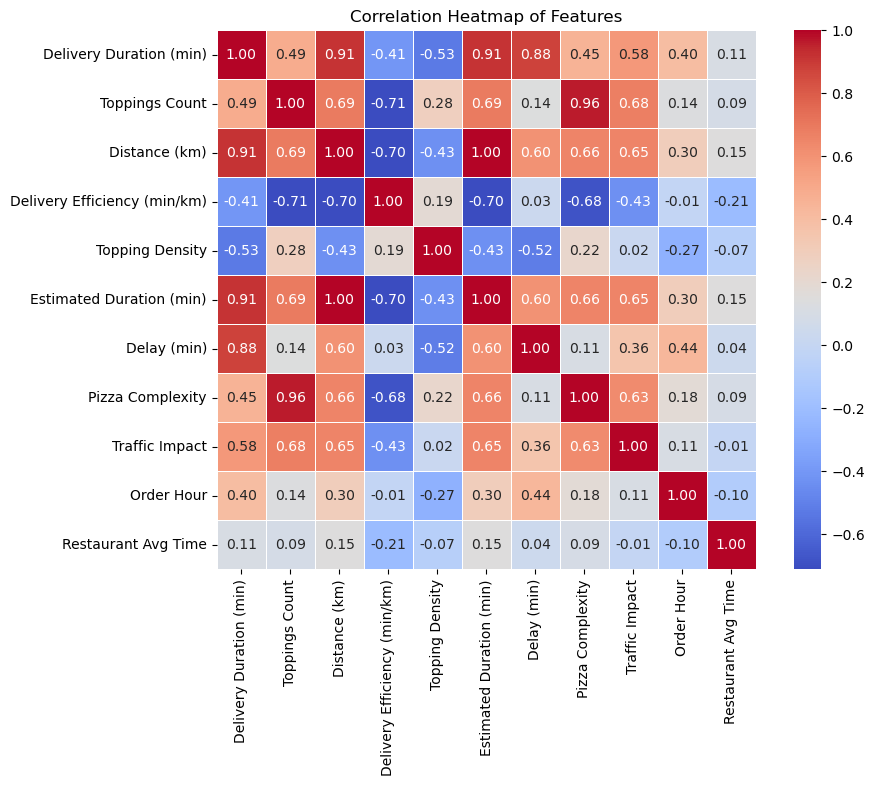

In [11]:
plt.figure(figsize=(10, 7))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

#### 3. Remove Outliers Using IQR Method

In [12]:
numeric_cols_alt = df.select_dtypes(include='number').columns # alternate method to identify numeric columns

mask = pd.Series(True, index=df.index) 

for col in numeric_cols_alt:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask &= df[col].between(lower, upper)


df_cleaned = df[mask] # cleaned dataset

df_cleaned.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
5,ORD006,Domino's,"New York, NY",2024-01-06 19:00:00,2024-01-06 19:20:00,20,Medium,Non-Veg,3,3.0,...,1.000000,January,Online,7.2,12.8,False,6,3,19,30.259434
6,ORD007,Papa John's,"Los Angeles, CA",2024-01-07 20:15:00,2024-01-07 20:40:00,25,Large,Veg,4,4.5,...,0.888889,January,Online,10.8,14.2,False,12,2,20,28.186275
7,ORD008,Little Caesars,"Chicago, IL",2024-01-08 18:30:00,2024-01-08 18:50:00,20,Small,Vegan,2,2.0,...,1.000000,January,Offline,4.8,15.2,False,2,1,18,28.844221


#### 4. Round Float Values for Consistency

In [13]:
float_cols = [] # Identify float columns and store the column names as a list

for i in df_cleaned.columns:
    if df_cleaned[i].dtype =='float64':
        float_cols.append(i)
    else:
        continue

float_cols

['Distance (km)',
 'Delivery Efficiency (min/km)',
 'Topping Density',
 'Estimated Duration (min)',
 'Delay (min)',
 'Restaurant Avg Time']

In [14]:
df_copy = df_cleaned.copy() # Creating a copied dataset so that the original dataset remains untouched

In [15]:
for col in float_cols:
    df_copy[col] = df_cleaned[col].round(3)

#### 5. Convert Data Types & Apply One-Hot Encoding

In [16]:
# Convert datetime columns

df_copy['Order Time'] = pd.to_datetime(df_copy['Order Time'])
df_copy['Delivery Time'] = pd.to_datetime(df_copy['Delivery Time'])

In [17]:
# Convert boolean categorical columns

df_copy['Is Peak Hour'] = df_copy['Is Peak Hour'].astype(int)
df_copy['Is Weekend'] = df_copy['Is Weekend'].astype(int)

In [18]:
# One-hot encode categorical variables

df_copy = pd.get_dummies(df_copy, columns = ['Pizza Size', 'Traffic Level', 'Payment Category'], drop_first = True) 

In [19]:
df_copy.head(2)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Type,Toppings Count,Distance (km),Payment Method,...,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,Pizza Size_Medium,Pizza Size_Small,Pizza Size_XL,Traffic Level_Low,Traffic Level_Medium,Payment Category_Online
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Non-Veg,4,5.0,Wallet,...,12,3,20,28.186,False,False,False,False,False,True
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,Cheese Burst,5,4.5,Cash,...,20,2,19,29.948,False,False,True,False,True,False


### **Modeling**

#### 1. Defining a new Dataset Using Required Columns

In [20]:
df_new = df_copy[['Delay (min)','Distance (km)','Is Peak Hour', 'Is Weekend',
    'Order Hour', 'Delivery Efficiency (min/km)', 'Pizza Size_Medium', 'Pizza Size_Small', 'Pizza Size_XL', 
    'Traffic Level_Low', 'Traffic Level_Medium', 'Payment Category_Online']].astype(int)

df_new.head()

,Delay (min),Distance (km),Is Peak Hour,Is Weekend,Order Hour,Delivery Efficiency (min/km),Pizza Size_Medium,Pizza Size_Small,Pizza Size_XL,Traffic Level_Low,Traffic Level_Medium,Payment Category_Online
1,13,5,1,0,20,5,0,0,0,0,0,1
3,14,4,1,0,19,5,0,0,1,0,1,0
5,12,3,1,1,19,6,1,0,0,0,0,1
6,14,4,1,1,20,5,0,0,0,0,1,1
7,15,2,1,0,18,10,0,1,0,1,0,0


#### 2. New Heatmap

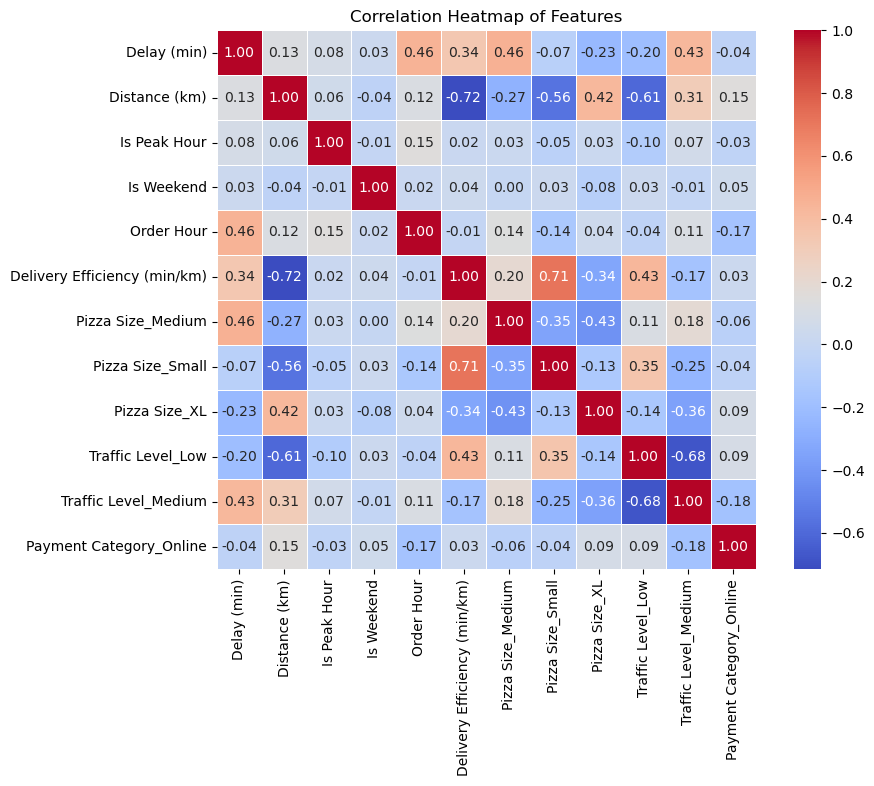

In [21]:
plt.figure(figsize=(10, 7))
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

**Note :** 

In the EDA phase, we generated a heatmap using only the original numeric features. At that point, some required categorical columns were still in string format and thus were excluded from the correlation matrix. However, after encoding these categorical variables, they were converted into binary numeric columns (e.g., `Pizza Size_Medium`, `Traffic Level_Medium`, etc.). As a result:
1. The dataset structure changed.
2. New variables were introduced
3. Correlation values shifted, especially due to the binary nature of dummy variable

Therefore, the heatmap after encoding reflects the true correlation of features that will be used in modeling, and it's the one we should consider when selecting features for machine learning..



#### 3. Defining Target and Feature Columns

Some features have negative correlation while other have positive correlation with the target variable (Delay(min)). Therefore, both positively and negatively correlated features with a meaningful correlation strength (|correlation| ≥ 0.2) are considered useful and included in the model. 
*(Refer to the New Heatmap)*

In [22]:
X = df_new[['Distance (km)','Order Hour', 'Delivery Efficiency (min/km)', 'Pizza Size_Medium',
    'Pizza Size_XL', 'Traffic Level_Low', 'Traffic Level_Medium']]  # Relevant Features

y = df_new['Delay (min)']  # Target variable

Here, among all the features only Distance (km) has a correlation of 0.13 but is still included. This is because it has both some signal and strong domain relevance - longer the distance, longer will be the delivery time and thus longer might be the delay.

While the rest variables have correlation less than 1 and don't have any strong real life or domain knowledge backing and thus are excluded

#### 4. Training and Scaling the variables

In [23]:
# Training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
# Scaling

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5. Linear Regression

In [25]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_test_scaled) # Predicting y
y_pred

array([18.82274997, 11.20870815,  8.74240182, 15.19227316, 18.82274997,
       15.51454346, 19.18578724, 15.19227316, 20.72089106, 20.67729372,
       17.09041425, 18.39255009, 18.82274997, 17.09041425, 12.49508667,
       17.09041425, 11.71826127, 13.10476142,  9.43068728, 20.72089106,
       15.51454346, 19.18578724, 15.51454346, 16.11489171, 15.51454346,
       17.09041425, 17.09041425, 18.39255009, 18.39255009, 18.39255009,
       13.10476142, 15.51454346, 12.49508667, 17.09041425, 18.39255009,
       15.51454346, 12.49508667, 18.82274997, 18.34895276, 18.82274997,
       13.10476142, 19.18578724, 18.39255009, 15.51454346, 20.72089106,
       18.82274997, 20.72089106, 15.51454346, 15.19227316, 15.51454346,
       19.51312324, 15.19227316, 16.35644364, 17.70217682, 15.51454346,
       15.19227316, 18.82274997, 13.10476142, 13.90589463, 15.07006512,
       13.06325191, 15.19227316, 13.10476142, 15.51454346, 20.72089106,
       10.27541782, 18.34895276, 19.10068039, 18.39255009, 13.10

In [27]:
r2_score(y_test, y_pred) #r2 score

0.823341157058033

In [28]:
mean_squared_error(y_test, y_pred)

1.8433618514315704

#### 6. Linearity Check

In [29]:
fitted_values = y_pred

residuals = y_test - y_pred

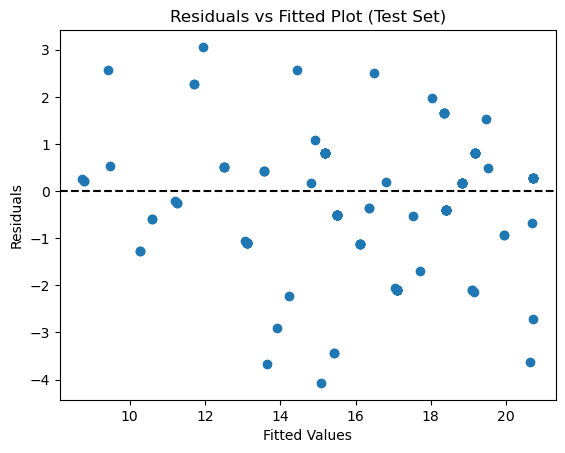

In [30]:
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot (Test Set)")
plt.show()

OLS residuals did not show strong non-linearity, but residual plots only reveal patterns in a limited way. They don't capture multi-dimensional non-linear interactions between features. Random Forest is designed to automatically learn interactions and local non-linear behavior, so I used it to test whether a more flexible model could extract additional predictive power.

#### 6. Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
y_pred_rf = rf.predict(X_test)

In [34]:
r2_score(y_test, y_pred_rf) #r2 score

0.9590882358779473

In [35]:
mean_squared_error(y_test, y_pred_rf)

0.42689731236456013

### **Comparing the two Models**

In [36]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_rf)],
    'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_rf)],
    'RMSE': [root_mean_squared_error(y_test, y_pred), root_mean_squared_error(y_test, y_pred_rf)],
    'R2': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_rf)]
})

In [37]:
results

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,1.045908,1.843362,1.357705,0.823341
1,Random Forest,0.245038,0.426897,0.653374,0.959088


### **Interpretation**

Random Forest outperforms Linear Regression across all evaluation metrics.
    
- The significantly lower error values (MAE, MSE, RMSE) suggest Random Forest makes more accurate predictions.
- The R² score of 0.959 indicates that Random Forest explains 95.9% of the variance in the target variable, compared to 82.3% by Linear Regression.
    
Random Forest is the superior model for this dataset, capturing complex, non-linear relationships more effectively than Linear Regression. Although it is less interpretable, the performance makes it the better choice in this case.

Also, as we are using Random Forest model for our dataset, we will not be testing for Heteroscedasticity, Multicollinearity, Autocorrelation and Normality of residuals because they are not applicable or meaningful for Random Forest. Linear Regression relies on these diagnostics and if we have chosen Linear Regression we would have to check for validation of these diagnostics.